In [2]:
import pandas as pd
import sklearn as skl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, recall_score,confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
# from tqdm import tqdm

In [71]:

Train_df = pd.read_csv('../data/anomalies_train.csv')
Test_df = pd.read_csv('../data/anomalies_test.csv')

y_train = Train_df['anomaly']
X_train = Train_df.drop(columns=['anomaly','0'],axis=1)
X_test = Test_df.drop(columns=['anomaly','0'],axis=1)
y_test= Test_df['anomaly']

In [22]:
RC = RandomForestClassifier(verbose= 1,n_jobs=-1,n_estimators=60,class_weight='balanced')
RC.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   20.7s finished


RandomForestClassifier(class_weight='balanced', n_estimators=60, n_jobs=-1,
                       verbose=1)

In [25]:
pred = pd.Series(RC.predict(X_test))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    3.7s finished


In [61]:
Test_df

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,anomaly,more_data_flag,same_zera
0,2018-05-13 10:40:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,False
1,2018-05-13 10:41:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,False
2,2018-05-13 10:42:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,False
3,2018-05-13 10:43:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,False
4,2018-05-13 10:44:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2022-10-30 07:55:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,True
1999996,2022-10-30 07:56:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,True
1999997,2022-10-30 07:57:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,True
1999998,2022-10-30 07:58:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,True


In [24]:
y_test.value_counts()

anomaly
0    1993160
1       6840
Name: count, dtype: int64

<AxesSubplot:>

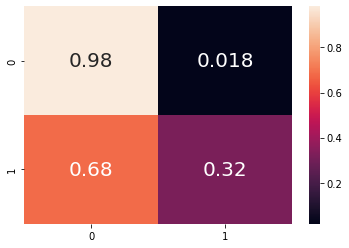

In [26]:
sns.heatmap(confusion_matrix(y_test,pred,normalize='true'),annot=True,annot_kws={'fontsize':20})

In [37]:
comp_df = pd.concat([pred,y_test],axis=1)
comp_df.columns=['pred','y_test']

In [39]:
comp_df.loc[comp_df.pred != comp_df.y_test]

,pred,y_test
14452,1,0
14453,1,0
14454,1,0
14455,1,0
14456,1,0
...,...,...
1997953,1,0
1997954,1,0
1997955,1,0
1997956,1,0


In [63]:
Test_df['same_zera'] = Test_df.iloc[:,1:49].apply(lambda x: True if sum(x) == 0 else False,axis=1)

In [64]:
Test_df[['anomaly','same_zera']].loc[Test_df.same_zera == True].value_counts(normalize=True)

anomaly  same_zera
0        True         0.999663
1        True         0.000337
Name: proportion, dtype: float64

In [65]:
Test_df[['anomaly','same_zera']].loc[Test_df.same_zera == False].value_counts(normalize=True)

anomaly  same_zera
0        False        0.98284
1        False        0.01716
Name: proportion, dtype: float64

In [60]:
Test_df.anomaly.value_counts()

anomaly
0    1993160
1       6840
Name: count, dtype: int64

In [66]:
Test_df[['anomaly','same_zera']].value_counts()

anomaly  same_zera
0        True         1632967
         False         360193
1        False           6289
         True             551
Name: count, dtype: int64

In [81]:
len([0 for x in range(1,len(Test_df.columns)-1 )])

53

In [79]:
Test_df.iloc[:,1:-1]

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
previous = [0 for x in range(1,len(Test_df.columns)-1 )]
current_count = [0 for x in range(1,len(Test_df.columns)-1 )]
streak = [[] for x in range(1,len(Test_df.columns)-1 )]
for i,data in tqdm(Test_df.iloc[:,:-1].iterrows(), total=Test_df.iloc[:,:-1].shape[0]):
    
    for x in range(53):
        if previous[x] == i:
            current_count[x]+=1
        else:
            streak[x].append(current_count[x])
            current_count[x] =0
            
    previous = data.to_list()
    
pd.Series(streak).value_counts()

100%|██████████| 2000000/2000000 [01:52<00:00, 17702.75it/s]


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]    50
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]     3
Name: count, dtype: int64

In [88]:
len(previous)

53

In [102]:
for i,series in enumerate(streak):
    streak[i] = pd.Series(series).value_counts()

In [98]:
df = pd.read_csv('../data/anomalies_train_all.csv')

In [101]:
df.isna().sum()

0                0
1             5941
2             5941
3             5941
4           945090
5           918531
6           874097
7           830539
8           779752
9           728556
10          674521
11          624223
12          567602
13          520422
14          471504
15          431374
16          398448
17          364201
18          331010
19          300548
20          270729
21          247880
22          231861
23          223250
24          222100
25          236610
26          250154
27          278897
28          309565
29          356308
30          393917
31          446435
32          487399
33          540091
34          574688
35          607447
36          642580
37          673214
38          704074
39          736577
40          766633
41          798164
42          821800
43          846723
44          872595
45          897249
46          917166
47          937858
48          945918
49          964540
50          967812
51          972344
52          

In [7]:
Train_all_df = pd.read_csv('../data/anomalies_train_all.csv')
Test_all_df = pd.read_csv('../data/anomalies_test_all.csv')
Test_all_df.fillna(0,inplace=True)
Train_all_df.fillna(0,inplace=True)

In [8]:
y_train_all = Train_all_df['is_storm']
X_train_all = Train_all_df.drop(columns=['is_storm','0'],axis=1)
y_test_all = Test_all_df['is_storm']
X_test_all = Test_all_df.drop(columns=['is_storm','0'],axis=1)


In [11]:
from sklearn.ensemble import RandomForestClassifier
RC = RandomForestClassifier(verbose= 1,n_jobs=-1,n_estimators=60,class_weight='balanced')
RC.fit(X_train_all,y_train_all)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   27.8s finished


RandomForestClassifier(class_weight='balanced', n_estimators=60, n_jobs=-1,
                       verbose=1)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    3.9s finished


<AxesSubplot:>

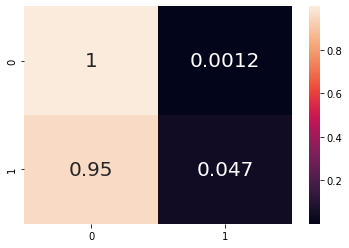

In [12]:
pred = pd.Series(RC.predict(X_test_all))
sns.heatmap(confusion_matrix(y_test_all,pred,normalize='true'),annot=True,annot_kws={'fontsize':20})

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC



In [4]:

Train_df = pd.read_csv('../data/anomalies_train.csv')
Test_df = pd.read_csv('../data/anomalies_test.csv')

y_train = Train_df['anomaly']
X_train = Train_df.drop(columns=['anomaly','0'],axis=1)
X_test = Test_df.drop(columns=['anomaly','0'],axis=1)
y_test= Test_df['anomaly']

In [12]:
clf1= RandomForestClassifier(n_estimators=60,class_weight='balanced',verbose=2,n_jobs=-1)
#clf2= SVC(verbose=1)
clf3= LogisticRegression(multi_class='multinomial', random_state=1,verbose=2)
clf4 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('RC', clf1), ('lr', clf3),('gnb', clf4)], voting='hard',n_jobs=-1,verbose=2)

In [13]:
eclf1.fit(X_train,y_train)

VotingClassifier(estimators=[('RC',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=60, n_jobs=-1,
                                                     verbose=2)),
                             ('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1, verbose=2)),
                             ('gnb', GaussianNB())],
                 n_jobs=-1, verbose=2)

In [7]:
def test_model(model,x_test,y_test,softmax= False):
    if softmax:
            pred = model.predict(x_test,verbose = 0)
            pred = np.argmax(pred,axis =1)
            pred = np.reshape(pred,newshape=pred.shape[0])
    else:
        pred = model.predict(x_test)
        pred = pd.Series(pred).apply(lambda x: round(x))
        y_test = y_test.apply(lambda x: round(x))
    print(f"accuracy : {accuracy_score(y_test,pred) }, ballanced accuracy: {balanced_accuracy_score(y_test,pred)},recal {recall_score(y_test,pred,average='macro')} ")
    plt.figure(figsize = (20,20))
    sns.heatmap(confusion_matrix(y_test,pred,normalize='true'),annot=True,annot_kws={'fontsize':20})

In [15]:
test_model(clf1,X_test,y_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [16]:
RC = RandomForestClassifier(verbose= 1,n_jobs=-1,n_estimators=60,class_weight='balanced')
RC.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   20.2s finished


RandomForestClassifier(class_weight='balanced', n_estimators=60, n_jobs=-1,
                       verbose=1)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    3.5s finished


accuracy : 0.979976, ballanced accuracy: 0.6482939078549224,recal 0.6482939078549224 


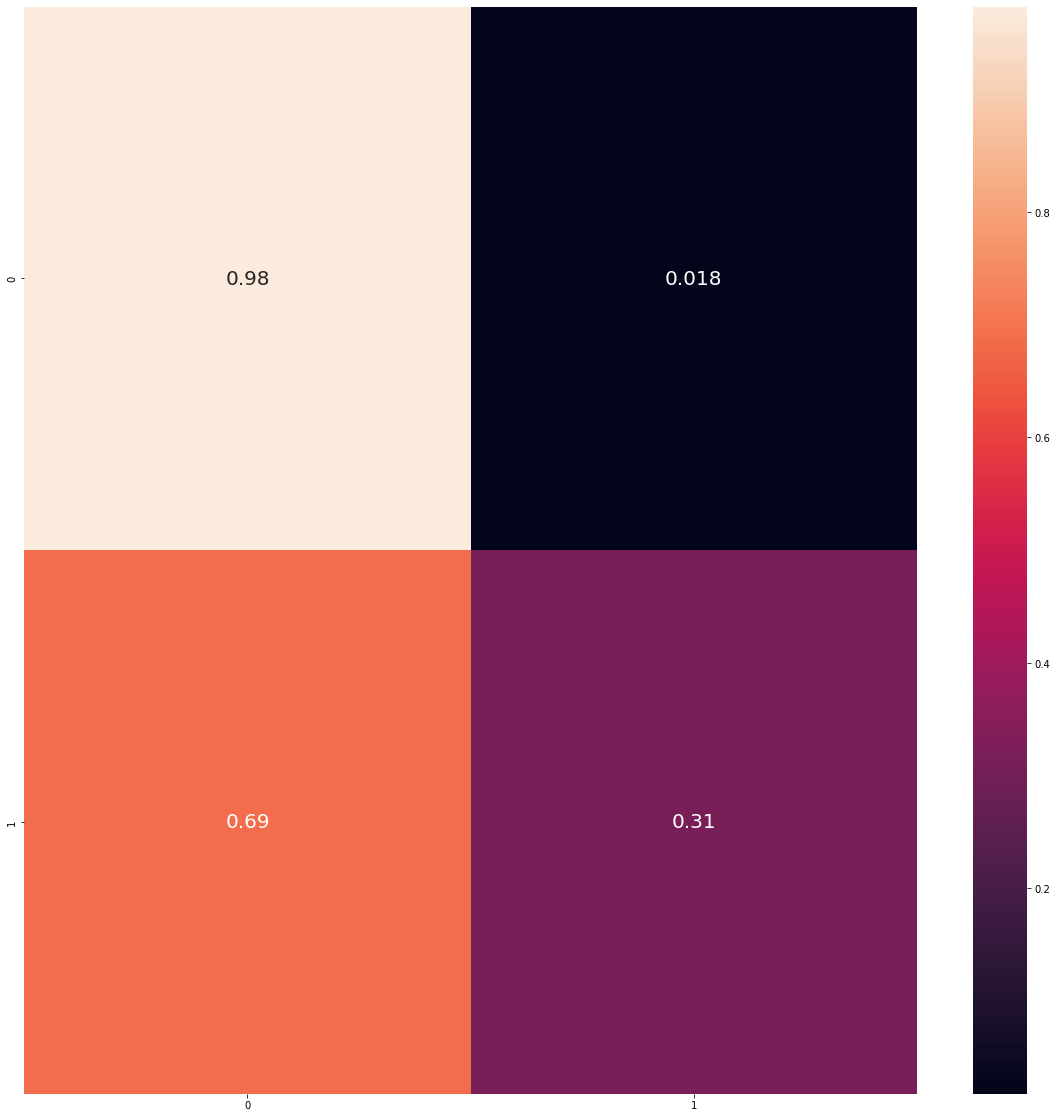

In [17]:
test_model(RC,X_test,y_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done  60 out of  60 | elapsed:    3.6s finished


accuracy : 0.979884, ballanced accuracy: 0.6207838439040465,recal 0.6207838439040465 


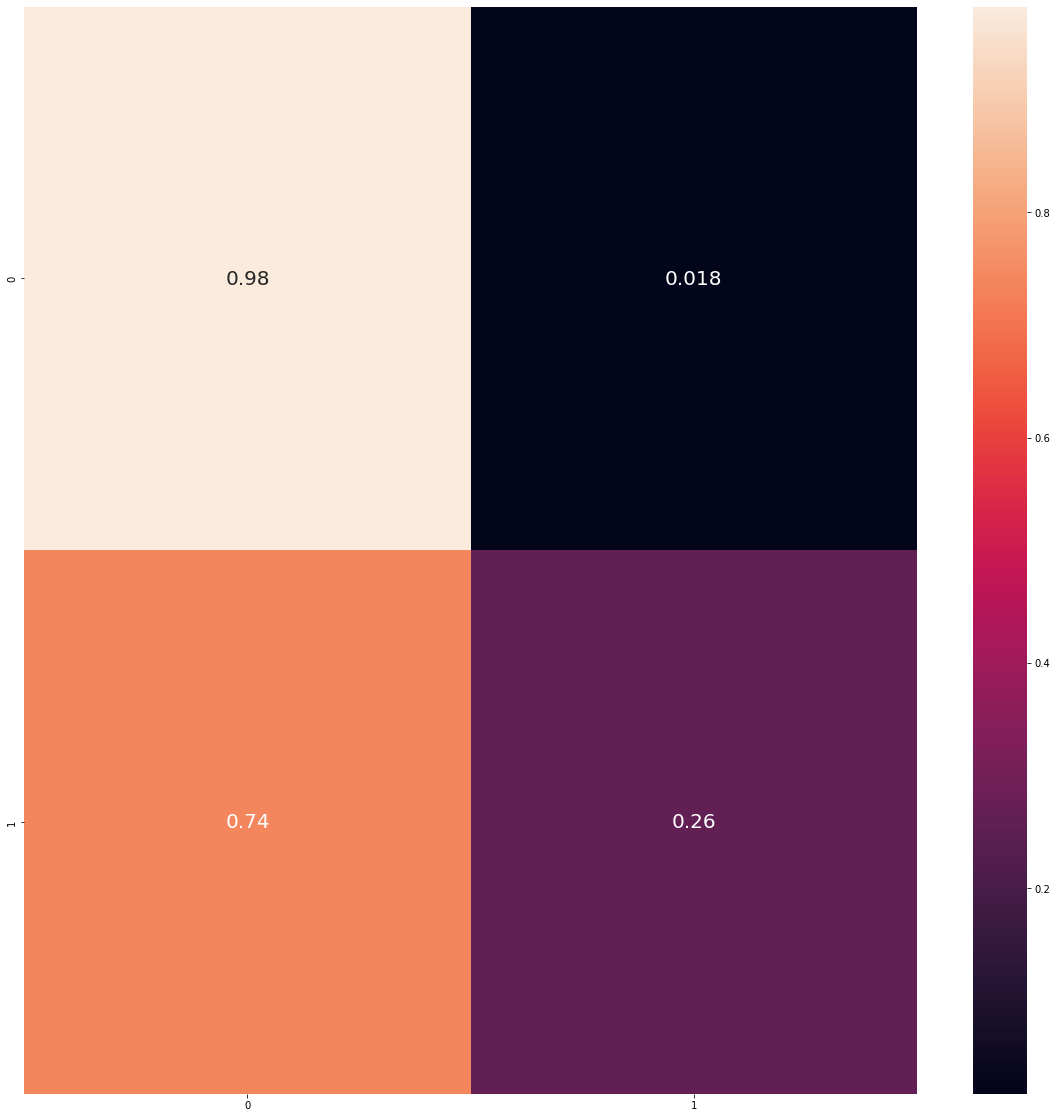

In [14]:
test_model(eclf1,X_test,y_test)
